## Name : Rohan Singh Rajput
### Assignment  : Kaggle House Price Prediction 
Description : This is a Kaggle Competition for the House Price Prediction. This is not a priced Competition we are using to enhance our data science skiils 
 
 
## Rules:
 
	
## TODO:
	
	
	


### DEVELOPMENT TRAIL
 ---------------------------------------------------------------------------------
 Date		Person						Notes
 2017-05-10 Rohan Rajput			  	Initial Creation of Notebook for the Data Analytics 

 

In [484]:
# Import libraries 

# Pandas 

import pandas as pd
from pandas import Series,DataFrame 


# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning 
from sklearn import preprocessing

In [485]:
# Get Data in Dataframe 
house_price_df = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [486]:
# Preview of Data 
#house_price_df.head()

In [487]:
# Preview of Data 
#test.head()

In [488]:
# Information 
print('-----------------Train Data----------------------->')
#house_price_df.info()
print('-----------------Test Data----------------------->')
#test.info()

-----------------Train Data----------------------->
-----------------Test Data----------------------->


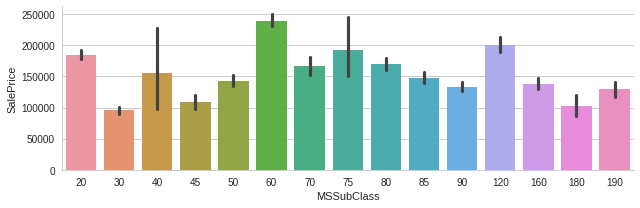

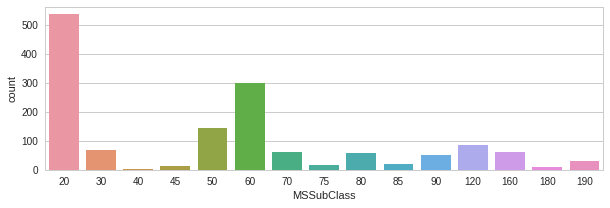

In [489]:
sns.factorplot('MSSubClass', 'SalePrice', data=house_price_df,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSSubClass', data=house_price_df, ax=axis1)

In [490]:
#house_price_df['MSSubClass'].value_counts()
#house_price_df['SalePrice'].describe()
#sns.countplot(x='SalePrice', hue="MSSubClass", data=house_price_df, order=[1,0], ax=axis2)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

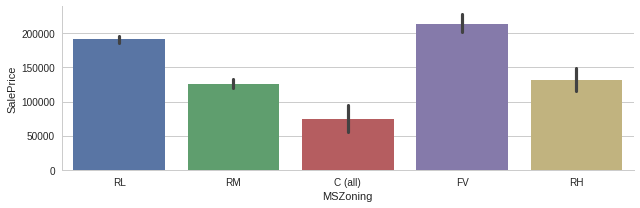

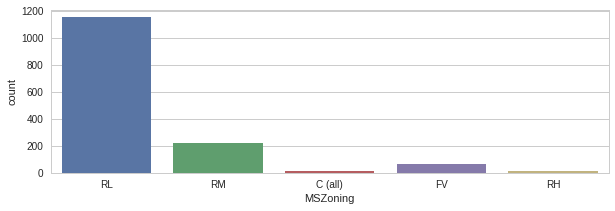

In [491]:
sns.factorplot('MSZoning', 'SalePrice', data=house_price_df,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=house_price_df, ax=axis1)
house_price_df['MSZoning'].value_counts()

In [492]:
house_price_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.88287575977


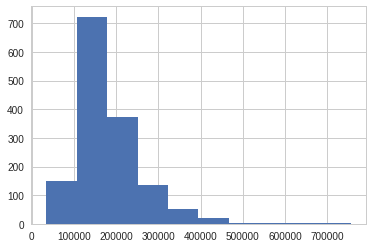

Skew is: 0.121335062205


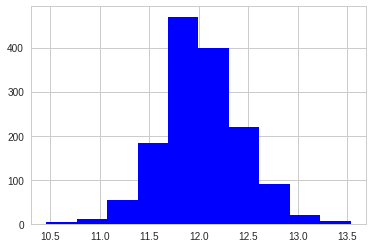

In [493]:



# Determining the Skewness of data 
print ("Skew is:", house_price_df.SalePrice.skew())

plt.hist(house_price_df.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
target = np.log(house_price_df.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()


In [494]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [495]:
# It is important to find out the numeric feature of the data so we will analyse it by using numpy library
numerical_features = house_price_df.select_dtypes(include=[np.number])
#numerical_features.dtypes

In [496]:
# Then we will try to find the corretation between the feature and target
corr = numerical_features.corr()
#print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
#print (corr['SalePrice'].sort_values(ascending=False)[-5:])
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [497]:
#This gives us most correlated five features from the data 
#We will analyse them further to get some more intution
house_price_df.OverallQual.unique()


array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [498]:
#Creating a pivot table 
quality_pivot = house_price_df.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)

In [499]:
#quality_pivot

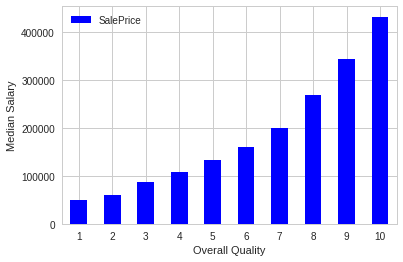

In [500]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Salary')
plt.xticks(rotation=0)
plt.show()

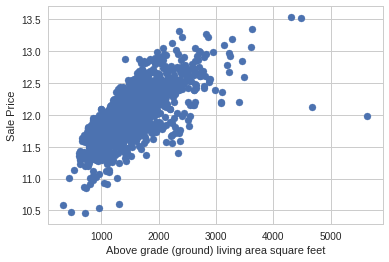

In [501]:
# Get some more intution using Scatter plot with Groundliving area and sales price
plt.scatter(x=house_price_df['GrLivArea'], y =target )
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

In [502]:
#Removing outliers ##Rohan&Rohan
train = house_price_df[house_price_df['GrLivArea'] < 4000] ##Rohan&Rohan

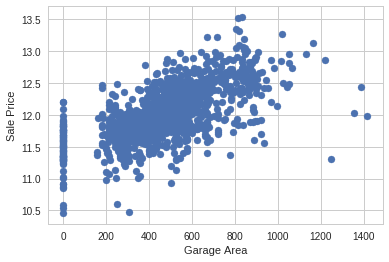

In [503]:
plt.scatter(x=house_price_df['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [504]:
#Removing outliers
train = house_price_df[house_price_df['GarageArea'] < 1200]

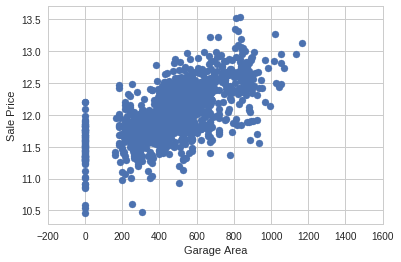

In [505]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

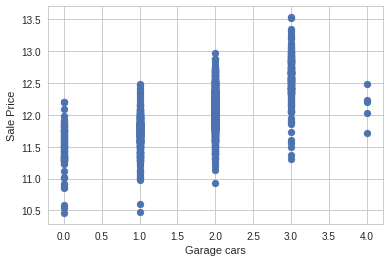

In [506]:
# Get some more intution using Scatter plot with Garage cars and sales price
##Rohan&Rohan
plt.scatter(x=house_price_df['GarageCars'], y =target )
plt.ylabel('Sale Price')
plt.xlabel('Garage cars')
plt.show()

In [507]:
#Removing outliers
#train = house_price_df[house_price_df['GarageCars'] < 4] ##Rohan&Rohan

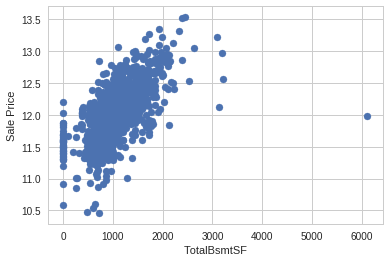

In [508]:
# Get some more intution using Scatter plot with TotalBsmtSF and sales price
##Rohan&Rohan
plt.scatter(x=house_price_df['TotalBsmtSF'], y =target )
plt.ylabel('Sale Price')
plt.xlabel('TotalBsmtSF')
plt.show()

In [509]:
#Removing outliers
train = house_price_df[house_price_df['GarageCars'] < 4000] ##Rohan&Rohan

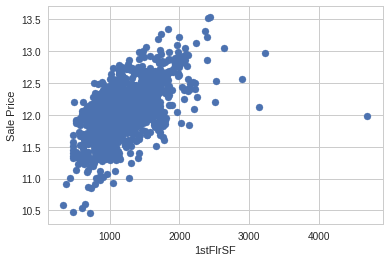

In [510]:
# Get some more intution using Scatter plot with 1stFlrSF and sales price
##Rohan&Rohan
plt.scatter(x=house_price_df['1stFlrSF'], y =target )
plt.ylabel('Sale Price')
plt.xlabel('1stFlrSF')
plt.show()

In [511]:
#Removing outliers
train = house_price_df[house_price_df['1stFlrSF'] < 4000] ##Rohan&Rohan

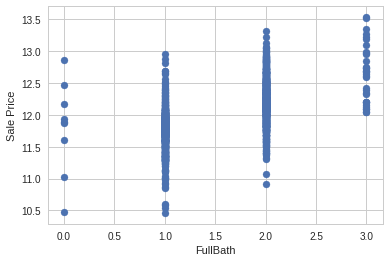

In [512]:
# Get some more intution using Scatter plot with FullBath and sales price
##Rohan&Rohan
plt.scatter(x=house_price_df['FullBath'], y =target )
plt.ylabel('Sale Price')
plt.xlabel('FullBath')
plt.show()

In [513]:
#Removing the null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1405
Alley,1368
Fence,1178
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


In [514]:
# Pool null value refers to no pool area
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [515]:
#Analysing the non numeric data 
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1459,1459,91,1459,1459,1459,1459,1459,1459,1459,...,1378,1378,1378,1378,1459,6,281,54,1459,1459
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1150,1453,50,925,1311,1458,1052,1381,225,1260,...,869,605,1310,1325,1339,2,157,49,1267,1198


In [516]:
#Data Trasformation 
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1453
Grvl       6
Name: Street, dtype: int64 



In [517]:
# Turn into one hot encoding 
#train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
#test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [518]:
# Encoded 
print ('Encoded: \n') 
#print (train.enc_street.value_counts())

Encoded: 



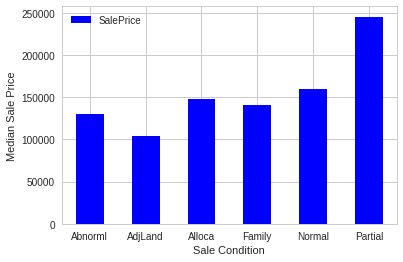

In [519]:
# Feature Engineering
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [520]:
#def encode(x): return 1 if x == 'Partial' else 0
#train['enc_condition'] = train.SaleCondition.apply(encode)
#test['enc_condition'] = test.SaleCondition.apply(encode)

In [521]:
#condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
#condition_pivot.plot(kind='bar', color='blue')
#plt.xlabel('Encoded Sale Condition')
#plt.ylabel('Median Sale Price')
#plt.xticks(rotation=0)
#plt.show()

In [522]:
#Interpolation of data 
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
#data 

In [523]:
sum(data.isnull().sum() != 0)

0

In [524]:
# Linear Model for the  train and test
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [525]:
#X



In [526]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [527]:
from sklearn import linear_model
from sklearn import ensemble

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)

In [528]:
model = lr.fit(X_train, y_train)

In [529]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.88414575115


In [530]:
predictions = model.predict(X_test)

In [531]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.0213837939468


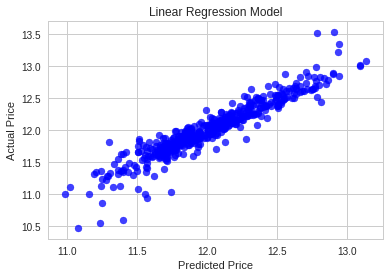

In [532]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

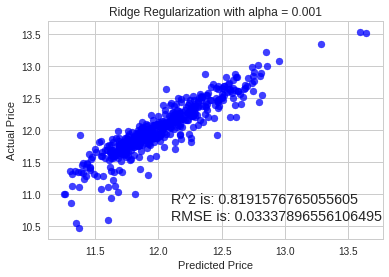

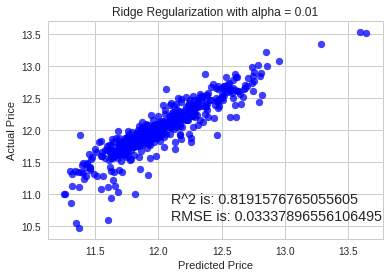

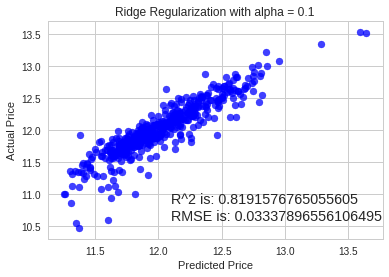

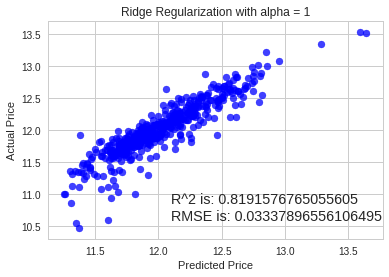

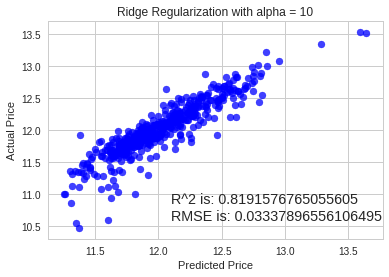

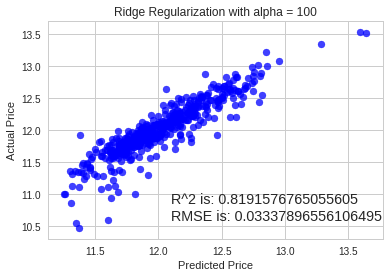

In [539]:
for i in range (-3, 3):
    alpha = 10**i
    rm = linear_model.Lasso(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [ ]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [ ]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()


In [ ]:
predictions = model.predict(feats)


In [ ]:
#feats

In [ ]:
final_predictions = np.exp(predictions)

In [ ]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

In [ ]:
submission['SalePrice'] = final_predictions
submission.head()

In [ ]:
submission.to_csv('submission1.csv', index=False)